# 19M18850 Ong Yuh Chian

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
import operator
import pandas as pd

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


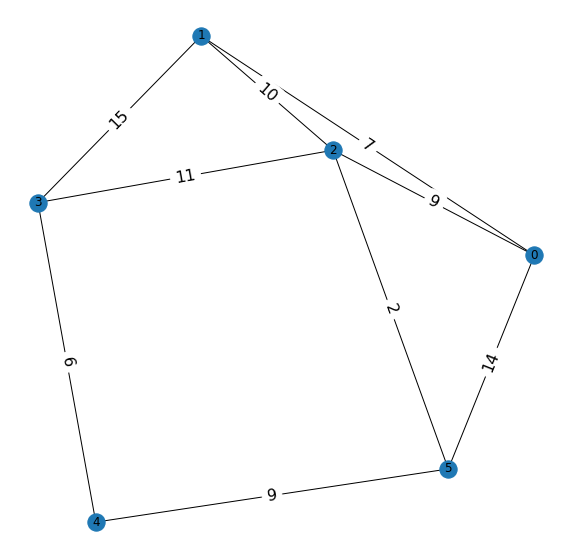

In [2]:
# create weighted graph
G = nx.Graph()
G.add_nodes_from(range(0, 5))
G.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), (0, 5, 14), (1, 2, 10), (1, 3, 15), (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

# plot the graph
plt.figure(figsize = (10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_size = 16, edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data = True)})
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

In [3]:
# Algorithm Packaged

def dijkstra(Graph, starting_vertex):
    
    print("For Graph of ", Graph)
    
    # prepare arrays for estimate and certainty
    dist_estimate = [sys.maxsize] * nx.number_of_nodes(Graph) 
    dist_certainty = [0] * nx.number_of_nodes(Graph)
    dist_estimate[starting_vertex] = 0

    while 0 in dist_certainty:
        print("Path Length : ", str(dist_estimate).replace("9223372036854775807", "∞"))
        print("Confirmed?  : ", dist_certainty)
        print("================")
        
        # decide current node (lowest value)
        min_length = sys.maxsize - 1
        
        for node in nx.nodes(Graph):
            if (dist_certainty[node] == 0) and (dist_estimate[node] <= min_length):
                min_length = dist_estimate[node]
                min_node = node
        
        print("Current node = ", min_node)
        
        # Update the path length of all neighbors of the current node
        for neighbor in Graph.neighbors(min_node):
            new_estimate = Graph[min_node][neighbor]['weight'] + dist_estimate[min_node]
            if new_estimate < dist_estimate[neighbor]:
                dist_estimate[neighbor] = new_estimate
        
        # Set certainty of current node to 1 so that it is not revisited
        dist_certainty[min_node] = 1
    
    # Final Output
    print("Path Length : ", str(dist_estimate).replace("9223372036854775807", "∞"))
    print("Confirmed?  : ", dist_certainty)
    print("================")

    print("Dijkstra's Algorithm Starting from Vertex", starting_vertex)
    return(pd.DataFrame(dist_estimate, columns = ["Dist"]).transpose())

## Answer to Question 2

In [4]:
dijkstra(G, 0)

For Graph of  
Path Length :  [0, ∞, ∞, ∞, ∞, ∞]
Confirmed?  :  [0, 0, 0, 0, 0, 0]
Current node =  0
Path Length :  [0, 7, 9, ∞, ∞, 14]
Confirmed?  :  [1, 0, 0, 0, 0, 0]
Current node =  1
Path Length :  [0, 7, 9, 22, ∞, 14]
Confirmed?  :  [1, 1, 0, 0, 0, 0]
Current node =  2
Path Length :  [0, 7, 9, 20, ∞, 11]
Confirmed?  :  [1, 1, 1, 0, 0, 0]
Current node =  5
Path Length :  [0, 7, 9, 20, 20, 11]
Confirmed?  :  [1, 1, 1, 0, 0, 1]
Current node =  4
Path Length :  [0, 7, 9, 20, 20, 11]
Confirmed?  :  [1, 1, 1, 0, 1, 1]
Current node =  3
Path Length :  [0, 7, 9, 20, 20, 11]
Confirmed?  :  [1, 1, 1, 1, 1, 1]
Dijkstra's Algorithm Starting from Vertex 0


,0,1,2,3,4,5
Dist,0,7,9,20,20,11


## Answer to Question 3

In [5]:
dijkstra(G, 1)

For Graph of  
Path Length :  [∞, 0, ∞, ∞, ∞, ∞]
Confirmed?  :  [0, 0, 0, 0, 0, 0]
Current node =  1
Path Length :  [7, 0, 10, 15, ∞, ∞]
Confirmed?  :  [0, 1, 0, 0, 0, 0]
Current node =  0
Path Length :  [7, 0, 10, 15, ∞, 21]
Confirmed?  :  [1, 1, 0, 0, 0, 0]
Current node =  2
Path Length :  [7, 0, 10, 15, ∞, 12]
Confirmed?  :  [1, 1, 1, 0, 0, 0]
Current node =  5
Path Length :  [7, 0, 10, 15, 21, 12]
Confirmed?  :  [1, 1, 1, 0, 0, 1]
Current node =  3
Path Length :  [7, 0, 10, 15, 21, 12]
Confirmed?  :  [1, 1, 1, 1, 0, 1]
Current node =  4
Path Length :  [7, 0, 10, 15, 21, 12]
Confirmed?  :  [1, 1, 1, 1, 1, 1]
Dijkstra's Algorithm Starting from Vertex 1


,0,1,2,3,4,5
Dist,7,0,10,15,21,12


## Answer to Question 4

Dijkstra's algorith would not work for negative edges.

Assuming a triangle where the Dijkstra's algorithm is applied from node A: 

''''''A'''''  
'''''/'''\ ''''  
'''2'''''1'''  
''/'''''''''\ ''  
'B-'-3'--C'  

When taking a direct route
A->B costs 2  
B->C costs -3  
A->C costs 1  
But the Dijkstra's algorithm will miss out on the route A->B->C, which costs only -1.  
This is because the order of operations will be first A, then C (the "nearest" node) and then B. By the time the algorithm reaches B, the node C is already locked in at the value of 1, and it is too late to change. 

Theoretically, Dijkstra's algorithm breaks down because it makes the assumption when selecting the next node for recalibration, it selects the neighbor which is the "nearest", i.e. the node which is the shortest length path away. And this assumption fundamentally affects the subsequent operations.

By adding negative weights into the graph, this assumption can no longer stand true. i.e. the next node selected may not be the "nearest" node, and the foundation of all subsequent calculation fails. 

For a more concrete example, see the cell below, where we add make the edge between nodes 1 and 2 to be a negative value of -10. As can be seen by the latest calculations, the algorithm breaks down by making the distance of node 1 as low as -13, even smaller than the negative weight.

This is because the breakdown of the assumption leads to the node distance update to count the negative weight twice. 

In [6]:
# create weighted graph
H = nx.Graph()
H.add_nodes_from(range(0, 5))
# We insert a negative weight between nodes 1 and 2
H.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), (0, 5, 14), (1, 2, -10), (1, 3, 15), (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

dijkstra(H, 0)

For Graph of  
Path Length :  [0, ∞, ∞, ∞, ∞, ∞]
Confirmed?  :  [0, 0, 0, 0, 0, 0]
Current node =  0
Path Length :  [0, 7, 9, ∞, ∞, 14]
Confirmed?  :  [1, 0, 0, 0, 0, 0]
Current node =  1
Path Length :  [0, 7, -3, 22, ∞, 14]
Confirmed?  :  [1, 1, 0, 0, 0, 0]
Current node =  2
Path Length :  [0, -13, -3, 8, ∞, -1]
Confirmed?  :  [1, 1, 1, 0, 0, 0]
Current node =  5
Path Length :  [0, -13, -3, 8, 8, -1]
Confirmed?  :  [1, 1, 1, 0, 0, 1]
Current node =  4
Path Length :  [0, -13, -3, 8, 8, -1]
Confirmed?  :  [1, 1, 1, 0, 1, 1]
Current node =  3
Path Length :  [0, -13, -3, 8, 8, -1]
Confirmed?  :  [1, 1, 1, 1, 1, 1]
Dijkstra's Algorithm Starting from Vertex 0


,0,1,2,3,4,5
Dist,0,-13,-3,8,8,-1
